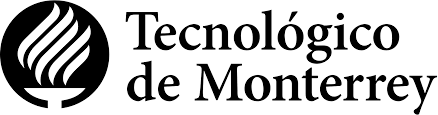

# <center>Semana 4 - Actividad 1</center>
## Ciencia y Analítica de datos
## _Maestría en Inteligencia Artificial Aplicada (MNA-V)_
### 11/10/2022
### Equipo 24 
#### _Victor Hugo Avila Felipe - A01794425_
#### _Andrés Eduardo Figueroa García - A01378536_

### Glosario
#### [0.- Instrucciones](#Instrucciones)
#### [1.- Parte 1: Ejercicio guiado](#Parte1)
##### [$\,\,\,$ Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos](#Parte1_1)
##### [$\,\,\,$ Paso 2: Interprete cada componente principal en términos de las variables originales](#Parte1_2)
##### [$\,\,\,$ Paso 3: Identifique valores atípicos](#Parte1_3)
#### [2.- Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook ](#Parte2)

<a id='Instrucciones'></a>
### 0.- Instrucciones
#### Parte 1: Ejercicio guiado 
Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos.

##### $\,\,\,$ Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos
    - Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

##### $\,\,\,$ Paso 2: Interprete cada componente principal en términos de las variables originales
    - Examine la magnitud y la dirección de los coeficientes de las variables originales.
      Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
      
##### $\,\,\,$ Paso 3: Identifique valores atípicos
    - Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.


#### Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook 

 1. ¿Cuál es el número de componentes mínimo y por qué?
 2. ¿Cuál es la variación de los datos que representan esos componentes?
 3. ¿Cuál es la pérdida de información después de realizar PCA?
 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

<a id='Parte1'></a>
### 1.- Parte 1

Se importan las librerías a utlizar en el ejercicio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

Se importa la Dataframe a utilizar en el análisis.

In [2]:
mypath = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(mypath, index_col=0)
df.index.name = None

Se eliminarán las columnas que contengan valores NULL y la variable "Y"

In [3]:
ndf = df.dropna(axis=0)
ndf = ndf.drop(["Y"], axis=1)

In [4]:
# ndf.head()

In [5]:
ndf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [6]:
# ndf.dtypes

Se realizará una tabla de correlación entre las variables de la tabla para visuaizar cuáles variables con las que podrían formar parte del mismo Component

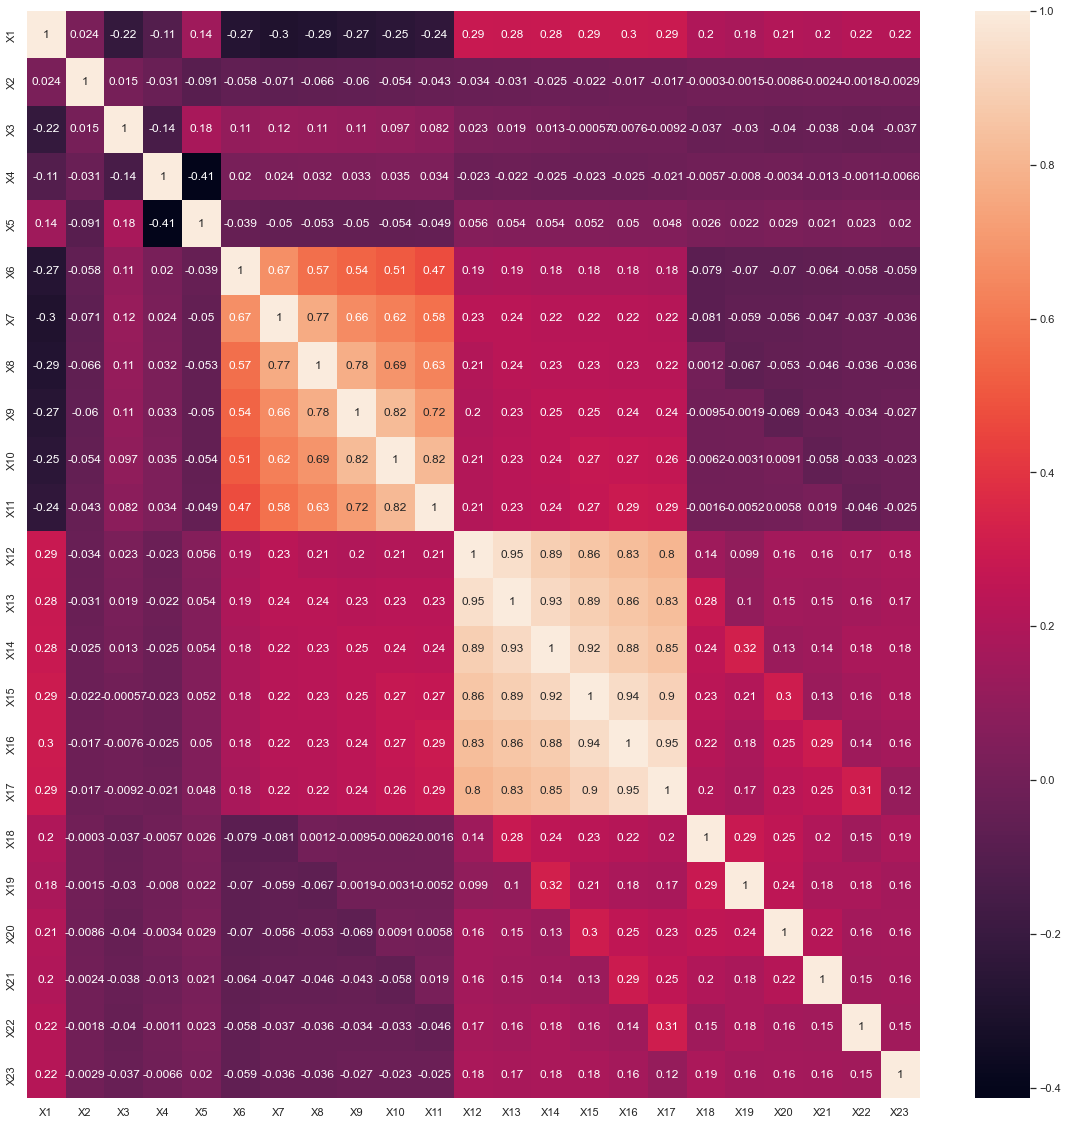

In [7]:
sns.set(rc={'figure.figsize':(20,20)}) 
CorrM = ndf.corr(method ='pearson')
sns.heatmap(CorrM, annot=True)
plt.show()

Se observa que las variabels entre X6 y X11 muestran una fuerte correlación positiva, al igual que X12 a X17. Se puede apreciar de igual forma una alta correlación negativa entre X4 y X5.

<a id='Parte1_1'></a>
#### Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Se normalizan los datos para evitar que unos tengan mayor influencia que otros por la magnitud que presentan. Se escogió como opción de normalización MinMax, ya nos dio mejores resultados en la generación del PCA.

In [8]:
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.StandardScaler()
scaler.fit(ndf)
sdf = pd.DataFrame(scaler.fit_transform(ndf.values), columns=ndf.columns, index=ndf.index)

pcs = PCA()

pcs.fit(sdf) 

PCA()

In [9]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,0.4898,0.2496,0.2018,0.1548,0.1290,0.1192,0.0963,0.0887,0.0738,0.0602,0.0519,0.0425,0.0367,0.0332,0.0317,0.0244,0.0208,0.0185,0.0155,0.0120,0.0104,0.0086,0.0062
Proportion of variance,0.5529,0.1436,0.0939,0.0552,0.0384,0.0327,0.0214,0.0181,0.0126,0.0084,0.0062,0.0042,0.0031,0.0025,0.0023,0.0014,0.0010,0.0008,0.0006,0.0003,0.0003,0.0002,0.0001
Cumulative proportion,0.5529,0.6964,0.7903,0.8455,0.8839,0.9167,0.9381,0.9562,0.9688,0.9771,0.9833,0.9875,0.9906,0.9931,0.9954,0.9968,0.9978,0.9986,0.9992,0.9995,0.9997,0.9999,1.0000


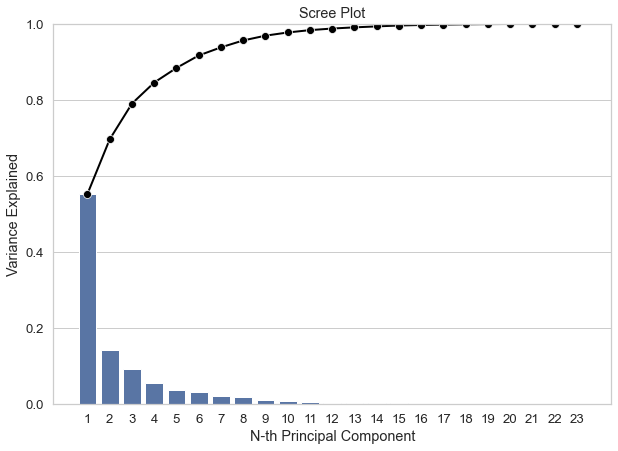

In [11]:
# Scree Plot
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [12]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.columns
                                )
# pcsComponents_df.iloc[:,:7]
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
X1,-0.008438,-0.208182,0.106591,0.637467,0.021764,0.059880,0.178625,-0.702173,-0.048290,0.029828,-0.007847,0.004808,-0.072535,-0.021133,-0.022578,-0.012116,-0.008252,-0.008372,-0.003005,-0.003841,0.003980,-0.000755,-0.000873
X2,-0.998288,0.044411,0.015108,0.005377,0.020535,-0.026461,-0.007243,0.002310,0.002278,-0.000162,0.001219,-0.000517,0.000005,0.001461,-0.000659,0.000778,0.000464,0.000685,0.000156,0.000053,0.000042,-0.000064,0.000082
X3,-0.002925,0.089291,0.201336,-0.377353,0.546826,0.662243,0.136332,-0.228124,-0.023180,0.009443,-0.008564,0.001848,0.001225,-0.010599,0.005813,-0.003772,-0.000691,-0.002564,-0.001968,-0.000766,0.000146,0.000221,0.000352
X4,0.011460,0.077536,-0.745903,0.101053,0.605515,-0.241777,-0.001175,-0.045880,-0.002286,0.003658,0.001734,0.000387,-0.004796,-0.003343,0.001556,-0.000351,-0.001640,-0.001405,0.000364,-0.000385,-0.000273,0.000243,-0.000219
X5,0.031781,-0.092906,0.605882,0.001958,0.533354,-0.575325,-0.042771,0.076562,0.008270,0.001798,0.002895,-0.003177,0.002705,0.001362,0.001954,0.001251,-0.000894,-0.000380,0.000507,-0.000216,-0.000391,-0.000006,0.000229
X6,0.017170,0.322965,0.037268,-0.024355,-0.023267,-0.032892,-0.562778,-0.229653,-0.641574,-0.292515,-0.152191,-0.029235,0.028767,0.006438,0.011222,0.003765,0.010457,0.001400,0.003579,-0.000215,-0.000472,-0.001003,-0.000028
X7,0.022178,0.402770,0.046181,-0.005379,-0.029863,-0.035579,-0.393608,-0.218278,0.252571,0.586535,0.455317,0.110664,0.001110,-0.029160,0.023405,-0.012139,0.030891,-0.020006,-0.009650,-0.003502,-0.001664,0.000368,-0.002633
X8,0.021050,0.416770,0.043913,0.010324,-0.035509,-0.064012,-0.077272,-0.173321,0.561640,-0.122766,-0.619992,-0.255935,0.005363,-0.006323,0.008747,0.000750,-0.030200,0.014223,0.025876,0.009024,-0.004231,-0.001001,0.004548
X9,0.019120,0.411812,0.045270,0.032573,-0.035984,-0.079501,0.257812,-0.063755,0.169798,-0.567992,0.319188,0.541049,-0.002492,-0.010995,0.005013,-0.008449,0.013713,0.036757,-0.030149,0.002849,0.003700,0.005418,-0.001672
X10,0.017178,0.391908,0.041108,0.052998,-0.036196,-0.074644,0.400518,0.033855,-0.186651,-0.055182,0.353070,-0.708594,-0.007334,0.008742,-0.003135,0.081872,-0.020225,-0.033718,0.009429,0.000196,0.003101,-0.006079,-0.000706


In [13]:
# pcsComponents_df.PC1.idxmax()

In [14]:
pcsComponents_df.PC1.nlargest(7)

X5     0.031781
X7     0.022178
X8     0.021050
X9     0.019120
X10    0.017178
X6     0.017170
X11    0.014573
Name: PC1, dtype: float64

In [24]:
pcsComponents_df.PC2.nlargest(7)

X8     0.416770
X9     0.411812
X7     0.402770
X10    0.391908
X11    0.376123
X6     0.322965
X3     0.089291
Name: PC2, dtype: float64

In [23]:
pcsComponents_df.PC3.nlargest(7)

X5     0.605882
X3     0.201336
X1     0.106591
X13    0.056330
X12    0.054126
X15    0.050550
X16    0.050022
Name: PC3, dtype: float64

In [22]:
pcsComponents_df.PC4.nlargest(7)

X1     0.637467
X13    0.311315
X12    0.295471
X15    0.286582
X16    0.283918
X17    0.210599
X14    0.175540
Name: PC4, dtype: float64

In [16]:
# pcsComponents_df.PC2.idxmin()

In [25]:
# pcsComponents_df.PC2.nsmallest(7)

<a id='Parte1_2'></a>
#### Paso 2: Interprete cada componente principal en términos de las variables originales

In [18]:
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


<a id='Parte1_3'></a>
#### Paso 3: Identifique valores atípicos

Para la búsqueda de valores atípicos se realizarán dos gráficas de boxplot. La primera se hará con los datos originarles, mientras que la segunda se hará con los valores escalados de tal manera que se puedan apreciar de mejor manera los valores atípicos para todas las variables sin importar la escala.

<AxesSubplot:>

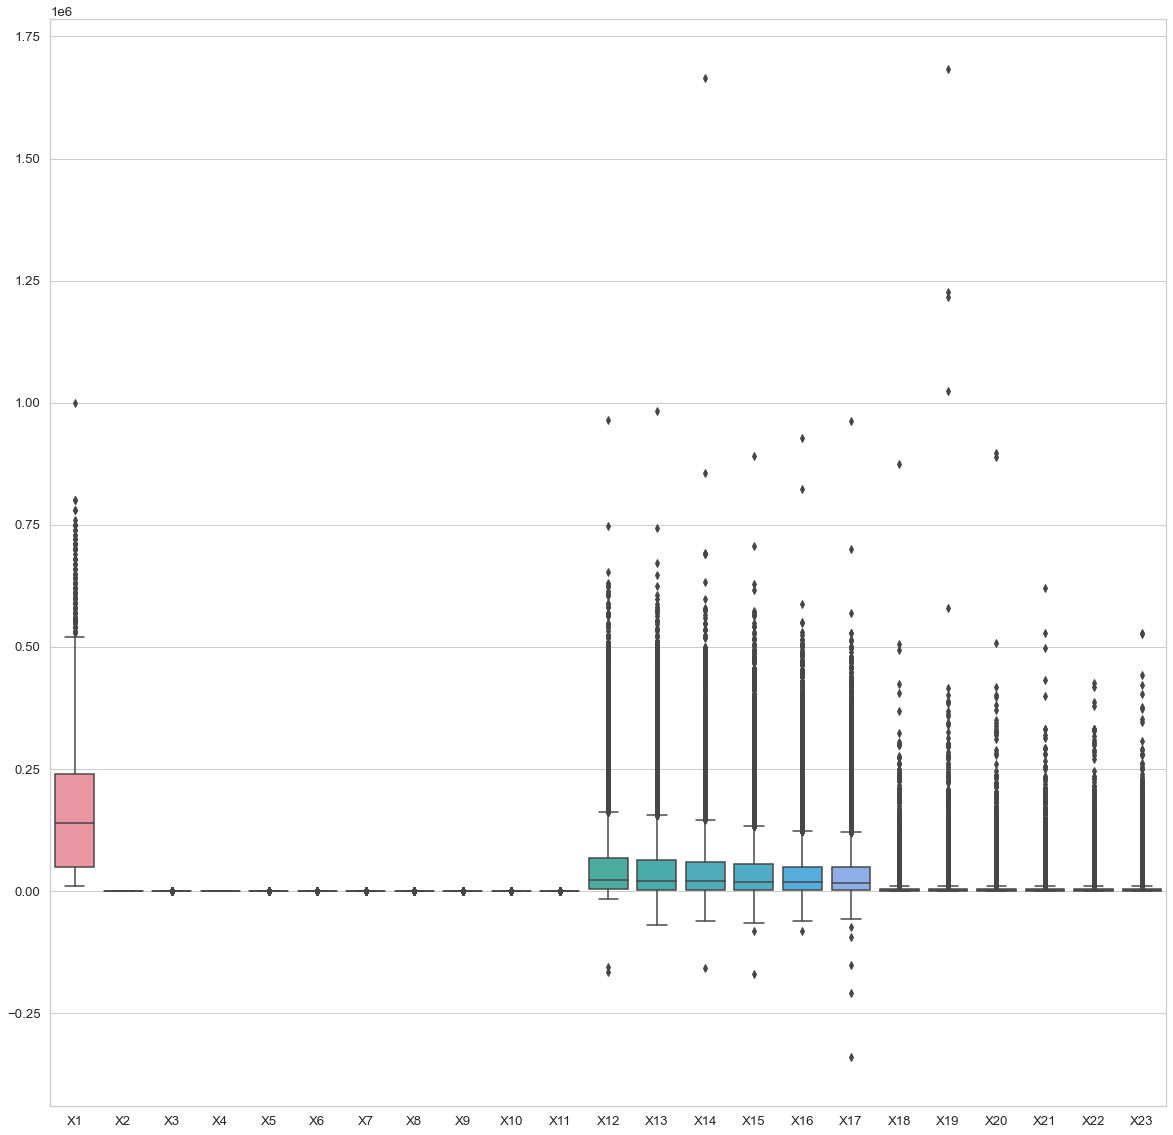

In [19]:
sns.boxplot(data=ndf)

<AxesSubplot:>

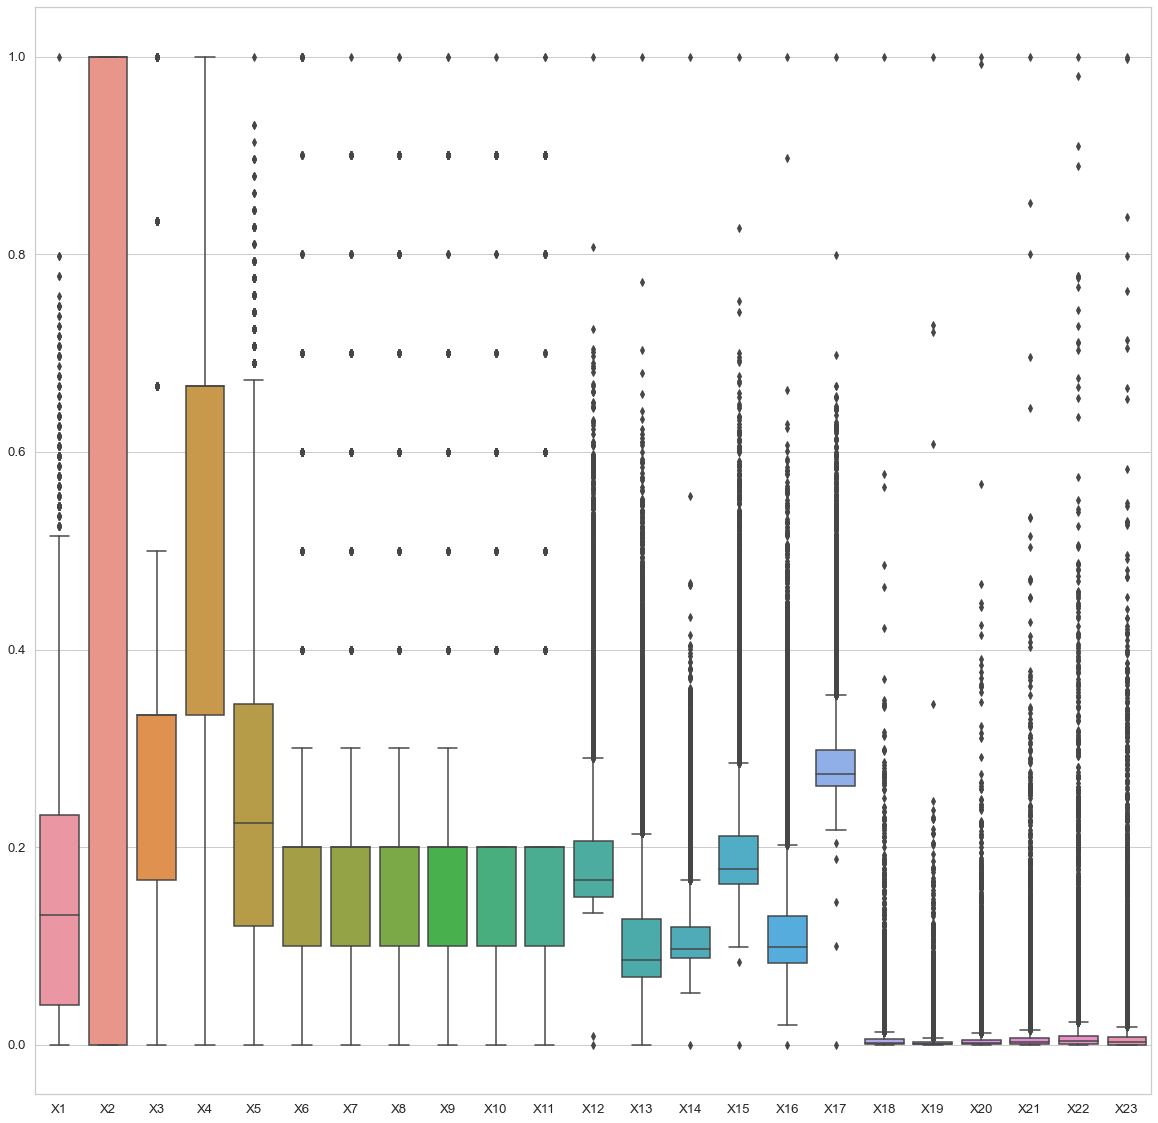

In [20]:
sns.boxplot(data=sdf)

<a id='Parte2'></a>
### 2.- Parte 2

#### 1. ¿Cuál es el número de componentes mínimo y por qué?

#### 2. ¿Cuál es la variación de los datos que representan esos componentes?

#### 3. ¿Cuál es la pérdida de información después de realizar PCA?

#### 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

#### 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?